In [1]:
import numpy as np
from imblearn.over_sampling import SMOTE, ADASYN

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn import metrics
np.random.seed(13)
from sklearn import svm
import pandas as pd
import matplotlib.pyplot as plt
import math
from __future__ import division
from sklearn.model_selection import KFold
from sklearn.preprocessing import normalize
from stockstats import StockDataFrame 
from googlefinance.client import get_price_data, get_prices_data, get_prices_time_data

import dataPreparation
files=['AAPL','AMZN','GOOGL','MSFT','FB','INTC','CSCO','CMCSA','NVDA','NFLX','ADBE','AMGN','TXN','AVGO','PYPL','GILD','COST','QCOM']       
     
prices=list()
sentiment=list()
for file in files:
    param = {
        'q': file, # Stock symbol (ex: "AAPL")
        'i': "900", # Interval size in seconds ("86400" = 1 day intervals)
        'x': "NASD", # INDEXNASDAQStock exchange symbol on which stock is traded (ex: "NASD")
        'p': "2Y" # Period (Ex: "1Y" = 1 year)
        }
    meanvector=[]
    sentimentVector =  pd.read_csv('/home/andrea/Desktop/NLFF/TechnicalSentiment/'+file+'.csv')
    price= pd.read_csv('/home/andrea/Desktop/NLFF/TechnicalDataset/indexes'+file+'.csv')
    #alignment of data
    maxdata=max(sentimentVector['initTime'])
    mindata=min(sentimentVector['initTime'])
    price=price[price['Unnamed: 0']>=mindata]
    price=price[price['Unnamed: 0']<=maxdata]
   
    sentimentVector=sentimentVector.drop(['Unnamed: 0', 'initTime' ], axis=1)
    meanvector=np.concatenate((sentimentVector,pd.rolling_mean(sentimentVector,5)),axis=1)
    meanvector=np.concatenate((meanvector,pd.rolling_mean(sentimentVector,10)),axis=1)
    meanvector=np.concatenate((meanvector,pd.rolling_mean(sentimentVector,15)),axis=1)
    meanvector=np.concatenate((meanvector,pd.rolling_mean(sentimentVector,20)),axis=1)
    price=price.drop(['Unnamed: 0'],axis=1)
    #['macd','macds', 'boll_ub', 'boll_lb','rsi_6','rsi_12','vr_6_sma','wr_10','wr_6''close_10_sma''tr''middle_{}_sma'
    #df['dma'] = df['close_10_sma'] - df['close_50_sma'] pdi'] = cls._get_pdi(df, 14)df['mdi'] = cls._get_mdi(df, 14)
    #df['dx'] = cls._get_dx(df, 14) df['adx'] = df['dx_6_ema'] df['adxr'] = df['adx_6_ema']]
    #
    sentiment.append(meanvector)
    prices.append(price)

/home/andrea/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:40: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=5,center=False).mean()
/home/andrea/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:41: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=10,center=False).mean()
/home/andrea/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:42: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=15,center=False).mean()
/home/andrea/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:43: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=20,center=False).mean()


In [2]:
def smote(x,y):
    X_resampled, y_resampled = SMOTE().fit_sample(x, y)
    #print('check',sum(y_resampled)/len(y_resampled))
    return X_resampled,y_resampled
def balance(x,y):
    posindex=np.where( y == 1 )
    negindex=np.where( y == 0 )
    xt=[]
    yt=[]
    yindex=[]
    nindex=min(len(posindex[0]),len(negindex[0]))

    #for i in range(1,nindex):
    yt=np.concatenate((y[posindex[0][0:nindex]],y[negindex[0][0:nindex]]))
    xt=np.concatenate((x[posindex[0][0:nindex]],x[negindex[0][0:nindex]]))
    
    return xt,yt

def balanceup(x,y):
    posindex=np.where( y == 1 )
    negindex=np.where( y == 0 )
    xt=[]
    yt=[]
    yindex=[]
    
    if(len(posindex[0])!=0 and len(negindex[0])!=0):
       
        nindex=max(len(posindex[0]),len(negindex[0]))
        mini=min(len(posindex[0]),len(negindex[0]))
        diff=nindex-mini
        u=0
        for i in range(0,mini):
            yt.append(y[posindex[0][i]])
            yt.append(y[negindex[0][i]])
            xt.append(x[posindex[0][i]])
            xt.append(x[negindex[0][i]])
        #print('first',sum(yt)/len(yt)) 
        if(len(posindex[0])>len(negindex[0])):
            toextract=negindex
            enter=posindex
        else:
            toextract=posindex
            enter=negindex
        if(diff!=0 and len(toextract[0])!=0):
            for i in range(0,diff):
                r=np.random.randint(0,len(toextract))
                yt.append(y[toextract[0][r]])
                xt.append(x[toextract[0][r]])
                yt.append(y[enter[0][mini+i]])
                xt.append(x[enter[0][mini+i]])
    else:
        #print('Unbalance')
        u=1
        xt=x
        yt=y
    #print(sum(yt)/len(yt))              
    return xt,yt,u
                    

Working on... AAPL
(2861, 25)
1000.0
Window: 0
[[149 134]
 [156 127]]
F1,score 0.46691176470588236
Accuracy: 0.4876325088339223
10000.0
Window: 4
[[178  99]
 [162 126]]
F1,score 0.4912280701754386
Accuracy: 0.5380530973451327
1000.0
Window: 5
[[188  94]
 [175 108]]
F1,score 0.445360824742268
Accuracy: 0.5238938053097345
251.18864315095797
Window: 25
[[152 138]
 [136 135]]
F1,score 0.4963235294117647
Accuracy: 0.5115864527629234
10000.0
Window: 26
[[157 129]
 [162 113]]
F1,score 0.437137330754352
Accuracy: 0.48128342245989303
3.9810717055349722
Window: 125
[[ 97 202]
 [ 32 210]]
F1,score 0.6422018348623854
Accuracy: 0.5674676524953789
1.0
Window: 130
[[  0 293]
 [  0 247]]
F1,score 0.627700127064803
Accuracy: 0.45740740740740743
1000.0
Window: 250
[[ 86  69]
 [186 175]]
F1,score 0.5785123966942148
Accuracy: 0.5058139534883721
251.18864315095823
Window: 260
[[ 89  83]
 [211 131]]
F1,score 0.4712230215827338
Accuracy: 0.4280155642023346
[0, 0, 0, 0, 0, 72, 72, 216, 216]
[0.487632508833922

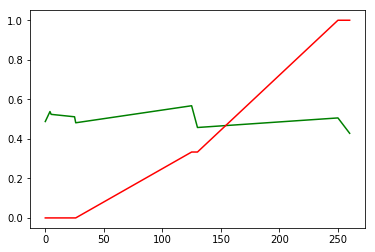

Working on... AMZN
(2718, 25)
1000.0
Window: 0
[[ 91 176]
 [100 172]]
F1,score 0.5548387096774193
Accuracy: 0.48794063079777367
1000.0
Window: 4
[[135 105]
 [144 154]]
F1,score 0.5529622980251346
Accuracy: 0.5371747211895911
0.003981071705534973
Window: 5
[[ 58 181]
 [ 79 220]]
F1,score 0.6285714285714286
Accuracy: 0.516728624535316
1.0
Window: 25
[[ 46 144]
 [ 93 251]]
F1,score 0.6792963464140729
Accuracy: 0.5561797752808989
1.0
Window: 26
[[ 51 143]
 [ 97 243]]
F1,score 0.6694214876033057
Accuracy: 0.550561797752809
63.0957344480193
Window: 125
[[107  81]
 [103 223]]
F1,score 0.707936507936508
Accuracy: 0.642023346303502
1.0
Window: 130
[[  0 186]
 [  0 327]]
F1,score 0.7785714285714287
Accuracy: 0.6374269005847953
1.0
Window: 250
[[  0 128]
 [  0 361]]
F1,score 0.8494117647058824
Accuracy: 0.7382413087934561
1.0
Window: 260
[[  0 132]
 [  0 355]]
F1,score 0.8432304038004751
Accuracy: 0.728952772073922
[0, 0, 0, 0, 0, 72, 144, 216, 216]
[0.48794063079777367, 0.5371747211895911, 0.516

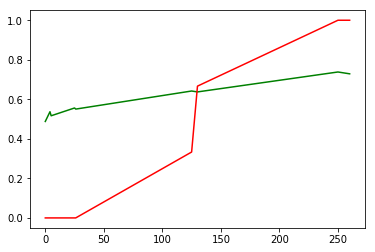

Working on... GOOGL
(3995, 25)
63.0957344480193
Window: 0
[[222 174]
 [210 192]]
F1,score 0.5
Accuracy: 0.518796992481203
251.18864315095823
Window: 4
[[199 184]
 [226 188]]
F1,score 0.4783715012722647
Accuracy: 0.48557089084065247
3.9810717055349722
Window: 5
[[ 47 330]
 [ 62 358]]
F1,score 0.6462093862815885
Accuracy: 0.5081555834378921
63.0957344480193
Window: 25
[[147 226]
 [131 289]]
F1,score 0.6181818181818183
Accuracy: 0.5498108448928121
10000.0
Window: 26
[[121 259]
 [124 289]]
F1,score 0.6014568158168575
Accuracy: 0.5170239596469105
0.15848931924611143
Window: 125
[[  0 375]
 [  0 398]]
F1,score 0.6797608881298036
Accuracy: 0.5148771021992238
0.15848931924611143
Window: 130
[[ 37 340]
 [ 24 371]]
F1,score 0.6708860759493671
Accuracy: 0.5284974093264249
1.0
Window: 250
[[  0 377]
 [  0 371]]
F1,score 0.6630920464700625
Accuracy: 0.4959893048128342
0.15848931924611143
Window: 260
[[375   7]
 [332  32]]
F1,score 0.15880893300248142
Accuracy: 0.5455764075067024
[0, 0, 0, 0, 0, 72,

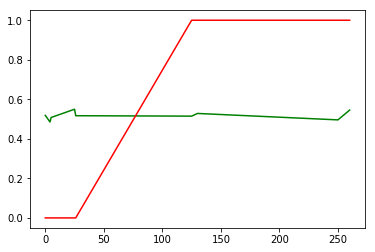

Working on... MSFT
(4576, 25)
0.15848931924611143
Window: 0
[[397  46]
 [409  57]]
F1,score 0.20035149384885761
Accuracy: 0.49944994499449946
10000.0
Window: 4
[[248 155]
 [304 201]]
F1,score 0.46689895470383275
Accuracy: 0.4944933920704846
251.18864315095823
Window: 5
[[178 225]
 [256 249]]
F1,score 0.508682328907048
Accuracy: 0.47026431718061673
10000.0
Window: 25
[[178 186]
 [260 280]]
F1,score 0.5566600397614314
Accuracy: 0.5066371681415929
0.15848931924611143
Window: 26
[[ 19 338]
 [ 62 485]]
F1,score 0.708029197080292
Accuracy: 0.5575221238938053
1000.0
Window: 125
[[ 27 285]
 [ 62 510]]
F1,score 0.7461594732991953
Accuracy: 0.6074660633484162
3.9810717055349722
Window: 130
[[ 17 285]
 [ 48 533]]
F1,score 0.7619728377412437
Accuracy: 0.622876557191393
251.18864315095823
Window: 250
[[ 51 196]
 [175 437]]
F1,score 0.702008032128514
Accuracy: 0.5681024447031432
251.18864315095797
Window: 260
[[ 63 201]
 [181 412]]
F1,score 0.6832504145936982
Accuracy: 0.5542590431738623
[0, 0, 0, 0

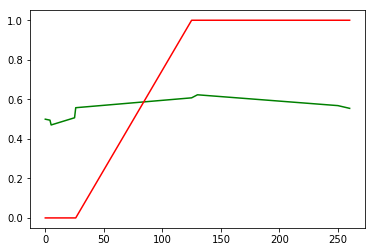

Working on... FB
(4561, 25)
1.0
Window: 0
[[113 325]
 [104 364]]
F1,score 0.6292134831460674
Accuracy: 0.5264900662251656
251.18864315095797
Window: 4
[[214 224]
 [246 221]]
F1,score 0.4846491228070176
Accuracy: 0.48066298342541436
251.18864315095823
Window: 5
[[197 244]
 [250 214]]
F1,score 0.4642082429501085
Accuracy: 0.45414364640883975
15.848931924611133
Window: 25
[[317 113]
 [339 132]]
F1,score 0.36871508379888274
Accuracy: 0.4983351831298557
63.0957344480193
Window: 26
[[331  98]
 [344 128]]
F1,score 0.3667621776504298
Accuracy: 0.5094339622641509
63.0957344480193
Window: 125
[[299  79]
 [335 168]]
F1,score 0.448
Accuracy: 0.5300794551645857
10000.0
Window: 130
[[129 261]
 [105 385]]
F1,score 0.6778169014084506
Accuracy: 0.5840909090909091
15.848931924611133
Window: 250
[[131 331]
 [ 91 303]]
F1,score 0.5894941634241245
Accuracy: 0.5070093457943925
1000.0
Window: 260
[[252 216]
 [216 170]]
F1,score 0.44041450777202074
Accuracy: 0.49414519906323184
[0, 0, 0, 0, 0, 0, 0, 0, 0]
[0.

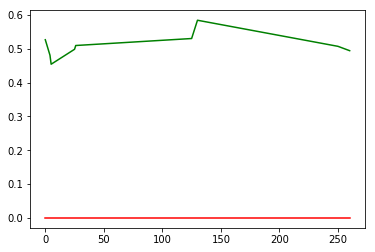

Working on... INTC
(4576, 25)


/home/andrea/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


10000.0
Window: 0
[[200 242]
 [225 242]]
F1,score 0.508937960042061
Accuracy: 0.48624862486248627
63.0957344480193
Window: 4
[[215 214]
 [216 263]]
F1,score 0.5502092050209205
Accuracy: 0.526431718061674
6.309573444801943
Window: 5
[[102 312]
 [120 374]]
F1,score 0.6338983050847458
Accuracy: 0.5242290748898678
10000.0
Window: 25
[[158 233]
 [278 235]]
F1,score 0.4791029561671764
Accuracy: 0.43473451327433627
251.18864315095823
Window: 26
[[121 263]
 [205 315]]
F1,score 0.5737704918032787
Accuracy: 0.4823008849557522
0.15848931924611143
Window: 125
[[ 11 231]
 [ 21 621]]
F1,score 0.8313253012048193
Accuracy: 0.7149321266968326
63.0957344480193
Window: 130
[[127 101]
 [249 406]]
F1,score 0.6987951807228916
Accuracy: 0.6036240090600227
6.309573444801943
Window: 250
[[133 112]
 [226 388]]
F1,score 0.696588868940754
Accuracy: 0.6065192083818394
1000.0
Window: 260
[[154  92]
 [295 316]]
F1,score 0.6202158979391561
Accuracy: 0.5484247374562428
[0, 0, 0, 0, 0, 0, 0, 216, 216]
[0.48624862486248

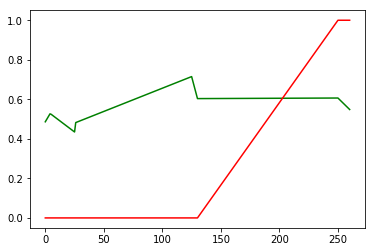

Working on... CSCO
(4575, 25)


/home/andrea/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


15.848931924611133
Window: 0
[[ 56 386]
 [ 68 399]]
F1,score 0.6373801916932907
Accuracy: 0.5005500550055005
10000.0
Window: 4
[[203 228]
 [248 229]]
F1,score 0.49036402569593146
Accuracy: 0.47577092511013214
0.0001
Window: 5
[[112 310]
 [139 347]]
F1,score 0.6071741032370954
Accuracy: 0.5055066079295154
10000.0
Window: 25
[[198 237]
 [227 242]]
F1,score 0.5105485232067511
Accuracy: 0.48672566371681414
10000.0
Window: 26
[[201 231]
 [235 237]]
F1,score 0.5042553191489362
Accuracy: 0.48451327433628316
0.0001
Window: 125
[[130 218]
 [207 329]]
F1,score 0.6075715604801478
Accuracy: 0.5192307692307693
0.003981071705534973
Window: 130
[[129 207]
 [209 338]]
F1,score 0.6190476190476191
Accuracy: 0.5288788221970555
1.0
Window: 250
[[  0 251]
 [  0 608]]
F1,score 0.8289025221540559
Accuracy: 0.7077997671711292
1.0
Window: 260
[[  0 250]
 [  0 607]]
F1,score 0.8292349726775956
Accuracy: 0.7082847141190198
[0, 0, 0, 0, 0, 0, 0, 216, 216]
[0.5005500550055005, 0.47577092511013214, 0.50550660792951

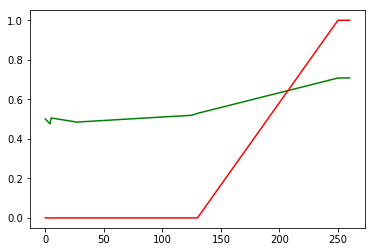

Working on... CMCSA
(4569, 25)
0.003981071705534973
Window: 0
[[430   4]
 [469   6]]
F1,score 0.024742268041237112
Accuracy: 0.47964796479647964
1000.0
Window: 4
[[120 320]
 [134 334]]
F1,score 0.5953654188948307
Accuracy: 0.5
1000.0
Window: 5
[[131 302]
 [148 327]]
F1,score 0.592391304347826
Accuracy: 0.5044052863436124
0.003981071705534973
Window: 25
[[439  36]
 [390  39]]
F1,score 0.15476190476190477
Accuracy: 0.5287610619469026
0.0001
Window: 26
[[451  27]
 [390  36]]
F1,score 0.147239263803681
Accuracy: 0.5387168141592921
1000.0
Window: 125
[[229 335]
 [127 193]]
F1,score 0.45518867924528306
Accuracy: 0.47737556561085975
10000.0
Window: 130
[[245 316]
 [144 178]]
F1,score 0.43627450980392163
Accuracy: 0.47904869762174407
251.18864315095823
Window: 250
[[ 63 495]
 [ 24 277]]
F1,score 0.516309412861137
Accuracy: 0.3958090803259604
1000.0
Window: 260
[[ 52 516]
 [ 17 272]]
F1,score 0.5051067780872794
Accuracy: 0.3780630105017503
[0, 0, 0, 0, 0, 0, 0, 0, 0]
[0.47964796479647964, 0.5, 

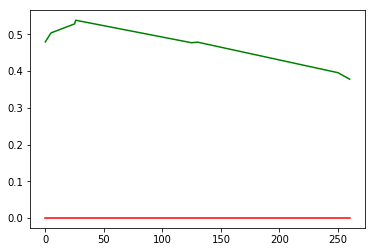

Working on... NVDA
(4576, 25)
10000.0
Window: 0
[[140 319]
 [148 302]]
F1,score 0.5639589169000933
Accuracy: 0.48624862486248627
1.0
Window: 4
[[196 232]
 [220 260]]
F1,score 0.5349794238683128
Accuracy: 0.5022026431718062
251.18864315095823
Window: 5
[[142 294]
 [135 337]]
F1,score 0.6110607434270173
Accuracy: 0.5275330396475771
1000.0
Window: 25
[[119 231]
 [237 317]]
F1,score 0.5753176043557169
Accuracy: 0.4823008849557522
6.309573444801943
Window: 26
[[145 214]
 [232 313]]
F1,score 0.583955223880597
Accuracy: 0.5066371681415929
10000.0
Window: 125
[[132 237]
 [355 160]]
F1,score 0.3508771929824561
Accuracy: 0.33031674208144796
10000.0
Window: 130
[[ 18 346]
 [ 61 458]]
F1,score 0.6923658352229781
Accuracy: 0.5390713476783692
0.15848931924611143
Window: 250
[[  1 323]
 [ 13 522]]
F1,score 0.7565217391304347
Accuracy: 0.6088474970896391
0.15848931924611143
Window: 260
[[  1 321]
 [ 15 520]]
F1,score 0.7558139534883722
Accuracy: 0.6079346557759626
[0, 0, 0, 0, 0, 0, 0, 216, 216]
[0.48

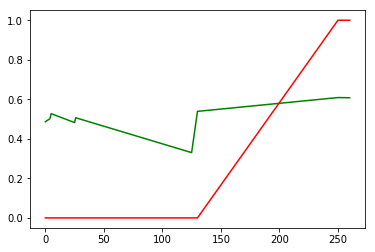

Working on... NFLX
(4575, 25)
10000.0
Window: 0
[[124 313]
 [150 322]]
F1,score 0.5817524841915086
Accuracy: 0.49064906490649063
15.848931924611133
Window: 4
[[ 99 295]
 [163 351]]
F1,score 0.6051724137931035
Accuracy: 0.4955947136563877
0.15848931924611143
Window: 5
[[ 45 348]
 [117 398]]
F1,score 0.6312450436161776
Accuracy: 0.4878854625550661
10000.0
Window: 25
[[246  93]
 [352 213]]
F1,score 0.4890929965556831
Accuracy: 0.5077433628318584
63.0957344480193
Window: 26
[[243  98]
 [367 196]]
F1,score 0.45740956826137685
Accuracy: 0.4856194690265487
1.0
Window: 125
[[  0 234]
 [  0 650]]
F1,score 0.8474576271186441
Accuracy: 0.7352941176470589
1.0
Window: 130
[[  0 238]
 [  0 645]]
F1,score 0.8442408376963351
Accuracy: 0.7304643261608154
15.848931924611133
Window: 250
[[  0 143]
 [ 44 672]]
F1,score 0.8778576094056172
Accuracy: 0.7823050058207218
3.9810717055349722
Window: 260
[[  0 136]
 [  0 721]]
F1,score 0.9138149556400507
Accuracy: 0.8413068844807468
[0, 0, 0, 0, 0, 72, 72, 72, 72

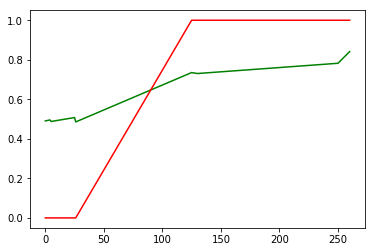

Working on... ADBE
(4574, 25)
63.0957344480193
Window: 0
[[229 190]
 [251 239]]
F1,score 0.5201305767138193
Accuracy: 0.5148514851485149
10000.0
Window: 4
[[264 162]
 [292 190]]
F1,score 0.4556354916067146
Accuracy: 0.5
251.18864315095823
Window: 5
[[291 131]
 [311 175]]
F1,score 0.44191919191919193
Accuracy: 0.513215859030837
3.9810717055349722
Window: 25
[[172 227]
 [215 290]]
F1,score 0.5675146771037182
Accuracy: 0.5110619469026548
63.0957344480193
Window: 26
[[231 174]
 [262 237]]
F1,score 0.5208791208791209
Accuracy: 0.5176991150442478
10000.0
Window: 125
[[140 158]
 [192 394]]
F1,score 0.6924428822495606
Accuracy: 0.6040723981900452
10000.0
Window: 130
[[126 160]
 [273 324]]
F1,score 0.599444958371878
Accuracy: 0.5096262740656852
10000.0
Window: 250
[[184  43]
 [263 369]]
F1,score 0.706896551724138
Accuracy: 0.6437718277066357
15.848931924611133
Window: 260
[[  0 225]
 [  0 632]]
F1,score 0.8488918737407656
Accuracy: 0.7374562427071178
[0, 0, 0, 0, 0, 72, 72, 72, 144]
[0.51485148

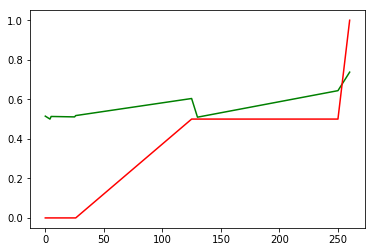

Working on... AMGN
(4573, 25)


/home/andrea/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


3.9810717055349722
Window: 0
[[195 259]
 [205 250]]
F1,score 0.5186721991701245
Accuracy: 0.48954895489548955
251.18864315095797
Window: 4
[[175 247]
 [264 222]]
F1,score 0.46492146596858636
Accuracy: 0.43722466960352424
6.309573444801943
Window: 5
[[205 212]
 [277 214]]
F1,score 0.4667393675027263
Accuracy: 0.46145374449339205
10000.0
Window: 25
[[213 215]
 [251 225]]
F1,score 0.4912663755458515
Accuracy: 0.48451327433628316
1.0
Window: 26
[[261 167]
 [233 242]]
F1,score 0.5475113122171945
Accuracy: 0.5570321151716501
0.003981071705534973
Window: 125
[[254  88]
 [260 282]]
F1,score 0.6184210526315789
Accuracy: 0.6063348416289592
0.15848931924611143
Window: 130
[[286  60]
 [310 227]]
F1,score 0.5509708737864077
Accuracy: 0.580973952434881
3.9810717055349722
Window: 250
[[345   0]
 [514   0]]
F1,score 0.0
Accuracy: 0.40162980209545984


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0001
Window: 260
[[339   0]
 [499  19]]
F1,score 0.0707635009310987
Accuracy: 0.4177362893815636
[0, 0, 0, 0, 0, 0, 0, 72, 72]
[0.48954895489548955, 0.43722466960352424, 0.46145374449339205, 0.48451327433628316, 0.5570321151716501, 0.6063348416289592, 0.580973952434881, 0.40162980209545984, 0.4177362893815636]
accuracy
accuracy


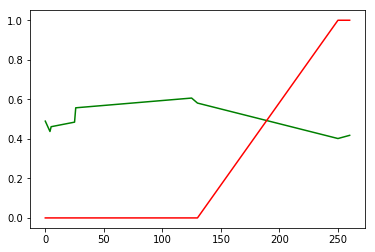

Working on... TXN
(4544, 25)
10000.0
Window: 0
[[264 178]
 [267 194]]
F1,score 0.4657863145258103
Accuracy: 0.5071982281284607
251.18864315095823
Window: 4
[[128 299]
 [223 253]]
F1,score 0.4922178988326848
Accuracy: 0.4219269102990033
251.18864315095823
Window: 5
[[167 256]
 [250 229]]
F1,score 0.475103734439834
Accuracy: 0.43902439024390244
10000.0
Window: 25
[[ 81 345]
 [ 90 382]]
F1,score 0.6371976647206005
Accuracy: 0.5155902004454342
251.18864315095797
Window: 26
[[ 82 340]
 [169 307]]
F1,score 0.5467497773820125
Accuracy: 0.43318485523385303
6.309573444801943
Window: 125
[[ 11 445]
 [ 27 395]]
F1,score 0.6259904912836767
Accuracy: 0.4624145785876993
3.9810717055349722
Window: 130
[[ 19 435]
 [ 10 413]]
F1,score 0.6498819826907947
Accuracy: 0.4925883694412771
3.9810717055349722
Window: 250
[[  0 417]
 [  3 433]]
F1,score 0.6734059097978227
Accuracy: 0.5076201641266119
1.0
Window: 260
[[  0 426]
 [  0 425]]
F1,score 0.6661442006269593
Accuracy: 0.4994124559341951
[0, 0, 0, 0, 0, 1

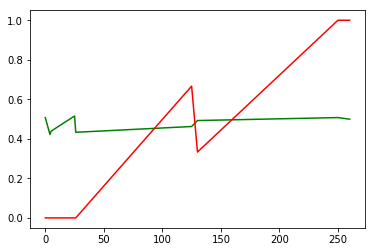

Working on... AVGO
(4575, 25)
10000.0
Window: 0
[[179 266]
 [186 278]]
F1,score 0.5515873015873015
Accuracy: 0.5027502750275028
251.18864315095823
Window: 4
[[245 218]
 [201 244]]
F1,score 0.5380374862183022
Accuracy: 0.538546255506608
6.309573444801943
Window: 5
[[133 325]
 [121 329]]
F1,score 0.5960144927536233
Accuracy: 0.5088105726872246
1.0
Window: 25
[[290 174]
 [244 196]]
F1,score 0.4839506172839506
Accuracy: 0.5376106194690266
251.18864315095823
Window: 26
[[250 218]
 [204 232]]
F1,score 0.5237020316027088
Accuracy: 0.5331858407079646
0.15848931924611143
Window: 125
[[433 103]
 [320  28]]
F1,score 0.11691022964509394
Accuracy: 0.5214932126696833
0.003981071705534973
Window: 130
[[  5 541]
 [  0 337]]
F1,score 0.5547325102880658
Accuracy: 0.3873159682899207
1000.0
Window: 250
[[345 227]
 [227  60]]
F1,score 0.20905923344947736
Accuracy: 0.47147846332945287
10000.0
Window: 260
[[315 239]
 [222  81]]
F1,score 0.26003210272873195
Accuracy: 0.4620770128354726
[0, 0, 0, 0, 0, 0, 0, 0

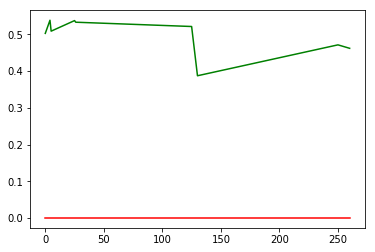

Working on... PYPL
(4551, 25)
6.309573444801943
Window: 0
[[ 99 337]
 [124 349]]
F1,score 0.6022433132010353
Accuracy: 0.49284928492849284
1.0
Window: 4
[[ 91 335]
 [124 358]]
F1,score 0.6093617021276596
Accuracy: 0.4944933920704846
0.0001
Window: 5
[[  0 404]
 [  0 504]]
F1,score 0.7138810198300284
Accuracy: 0.5550660792951542
0.15848931924611143
Window: 25
[[ 78 317]
 [123 386]]
F1,score 0.6369636963696369
Accuracy: 0.5132743362831859
10000.0
Window: 26
[[ 46 338]
 [ 75 445]]
F1,score 0.6830391404451266
Accuracy: 0.543141592920354
63.0957344480193
Window: 125
[[ 83 261]
 [196 344]]
F1,score 0.6008733624454149
Accuracy: 0.4830316742081448
1.0
Window: 130
[[ 97 248]
 [277 261]]
F1,score 0.498567335243553
Accuracy: 0.40543601359003395
1.0
Window: 250
[[  0 318]
 [  0 541]]
F1,score 0.7728571428571428
Accuracy: 0.629802095459837
10000.0
Window: 260
[[ 12 308]
 [ 60 477]]
F1,score 0.7216338880484116
Accuracy: 0.5705950991831972
[0, 0, 0, 0, 0, 0, 0, 144, 144]
[0.49284928492849284, 0.49449

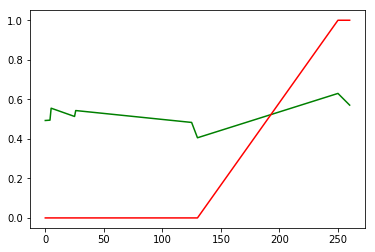

Working on... GILD
(4553, 25)


/home/andrea/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


1.0
Window: 0
[[ 88 370]
 [ 72 379]]
F1,score 0.6316666666666666
Accuracy: 0.5137513751375138
1000.0
Window: 4
[[105 361]
 [104 338]]
F1,score 0.5924627519719544
Accuracy: 0.4878854625550661
1.0
Window: 5
[[ 58 418]
 [ 45 387]]
F1,score 0.6257073565076798
Accuracy: 0.4900881057268722
0.15848931924611143
Window: 25
[[159 364]
 [115 266]]
F1,score 0.526211671612265
Accuracy: 0.47013274336283184
251.18864315095823
Window: 26
[[166 362]
 [107 269]]
F1,score 0.5342601787487588
Accuracy: 0.4811946902654867
1000.0
Window: 125
[[210 244]
 [205 225]]
F1,score 0.5005561735261402
Accuracy: 0.4920814479638009
1000.0
Window: 130
[[237 221]
 [203 222]]
F1,score 0.511520737327189
Accuracy: 0.5198187995469988
0.0001
Window: 250
[[394   0]
 [465   0]]
F1,score 0.0
Accuracy: 0.4586728754365541


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0001
Window: 260
[[405   0]
 [452   0]]
F1,score 0.0
Accuracy: 0.4725787631271879
[0, 0, 0, 0, 0, 0, 0, 144, 144]
[0.5137513751375138, 0.4878854625550661, 0.4900881057268722, 0.47013274336283184, 0.4811946902654867, 0.4920814479638009, 0.5198187995469988, 0.4586728754365541, 0.4725787631271879]
accuracy
accuracy


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


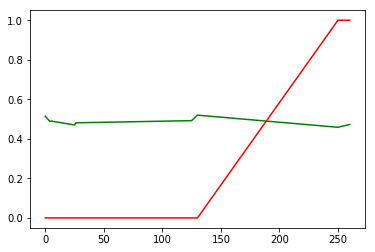

Working on... COST
(4575, 25)
63.0957344480193
Window: 0
[[226 212]
 [240 231]]
F1,score 0.5054704595185995
Accuracy: 0.5027502750275028
10000.0
Window: 4
[[107 321]
 [113 367]]
F1,score 0.6284246575342465
Accuracy: 0.5220264317180616
1000.0
Window: 5
[[248 182]
 [253 225]]
F1,score 0.5084745762711864
Accuracy: 0.5209251101321586
0.15848931924611143
Window: 25
[[211 238]
 [279 176]]
F1,score 0.4050632911392405
Accuracy: 0.4280973451327434
0.15848931924611143
Window: 26
[[217 236]
 [308 143]]
F1,score 0.3445783132530121
Accuracy: 0.39823008849557523
10000.0
Window: 125
[[129 240]
 [284 231]]
F1,score 0.46855983772819476
Accuracy: 0.4072398190045249
10000.0
Window: 130
[[240 106]
 [379 158]]
F1,score 0.39450686641697885
Accuracy: 0.4507361268403171
0.15848931924611143
Window: 250
[[  0 316]
 [  0 543]]
F1,score 0.774607703281027
Accuracy: 0.6321303841676368
10000.0
Window: 260
[[ 25 293]
 [ 39 500]]
F1,score 0.7507507507507507
Accuracy: 0.6126021003500584
[0, 0, 0, 0, 0, 0, 0, 144, 144]


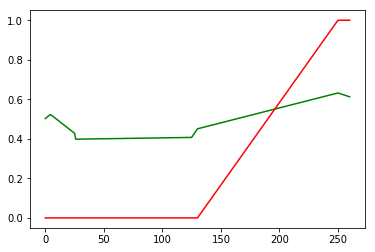

Working on... QCOM
(4576, 25)


/home/andrea/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


10000.0
Window: 0
[[214 224]
 [228 243]]
F1,score 0.5181236673773988
Accuracy: 0.5027502750275028
251.18864315095823
Window: 4
[[206 251]
 [204 247]]
F1,score 0.5205479452054794
Accuracy: 0.4988986784140969
251.18864315095823
Window: 5
[[193 266]
 [181 268]]
F1,score 0.5452695829094609
Accuracy: 0.5077092511013216
251.18864315095823
Window: 25
[[174 362]
 [165 203]]
F1,score 0.43515541264737406
Accuracy: 0.4170353982300885
251.18864315095797
Window: 26
[[200 340]
 [185 179]]
F1,score 0.40543601359003395
Accuracy: 0.4192477876106195
6.309573444801943
Window: 125
[[408  86]
 [254 136]]
F1,score 0.4444444444444444
Accuracy: 0.6153846153846154
0.15848931924611143
Window: 130
[[426  55]
 [274 128]]
F1,score 0.4376068376068376
Accuracy: 0.6274065685164213
0.0001
Window: 250
[[  0 512]
 [  0 347]]
F1,score 0.5754560530679934
Accuracy: 0.4039580908032596
0.0001
Window: 260
[[  0 529]
 [  0 328]]
F1,score 0.5535864978902953
Accuracy: 0.38273045507584597
[0, 0, 0, 0, 0, 0, 0, 72, 72]
[0.50275027

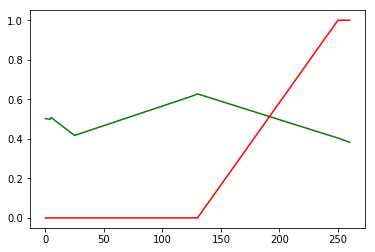

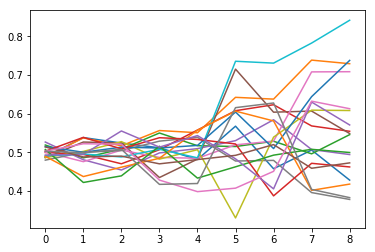

In [8]:
o=0
accstocksresults=[]
f1stocksresults=[]
f1scoreresults=[]
aucresults=[]

for price in prices:
    #print('New price[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]')
    
   
    print('Working on...',files[o])
    
    senttemp=sentiment[o]
    print(senttemp.shape)
    xtemp=price
    o+=1
    senttemp=np.nan_to_num(np.asarray(senttemp, dtype=float))
    xtemp=np.nan_to_num(np.asarray(xtemp, dtype=float))
    xtemp=normalize(xtemp,axis=0,norm='max')
    #print(xtemp)
    accintime=[]
    trendwindowtime=[0,4,5,25,26,125,130,250,260]
    f1total=[]
    acctotal=[]
    auctotal=[]
    f1scoretotal=[]
    for t in trendwindowtime:
        #1
    #label because of the maket and append values without data
    #simo theroy past trend
        
        x=[]
        y=[]
        

        #print('============================================================')
        #print('Working on window:',t)
        #print(len(xtemp))
        ##QUI C E L'UNICO APPUNTO GUARDA SE CON +1 CAMBIA
        for i in range(0,len(price)-t-1):
            s=np.sign(price.iloc[i+t+1]['close']-price.iloc[i+1]['open'])
            
            if(s==-1):
                y.append(0)
            else:
                y.append(1)
            x.append(senttemp[i])
        y=np.array(y)
        
        x=np.array(x)
        
        permindex=range(0,len(x))
        #permindex=np.random.permutation(permindex)
        train=0.8
        nt=math.ceil(len(x)*train)
        trainvalindex=permindex[0:nt]
        testindex=permindex[nt:]
        x_tv=[]
        y_tv=[]
        x_test=[]
        y_test=[]
        x_tv=x[trainvalindex]
        y_tv=y[trainvalindex]
        x_test=x[testindex]
        y_test=y[testindex]
    

        cspace=np.concatenate(((np.logspace(0,3,6)),np.logspace(-4,4,6)))
        gspace=np.logspace(-5,2,6)
        bestsvm=None
        maxacc=0
        cvacc=0
        maxg=0
        maxc=0
        #print('Model Selection...')
        #model selection
        cvacc=0
        totu=0
        for c in cspace:
            #print()
            for g in gspace:
                
                cvacclist=[]
                #faccio cross validation
                #start with 40% as train and 10% for validation and then i move in percentege
                # 0-40 40-50
                # 0-50 50-60
                # 0-60 60-70 
                #etc test set is completely external i do in some way error extimation changin the ticker
                trainpoint=math.floor(len(x_tv)*0.40)
                dimval=math.floor(trainpoint*0.25)
                endval=trainpoint+dimval
                
                for i in range(0,6):
                    #print('-----')
                    x_train=x_tv[0:trainpoint]
                    y_train=y_tv[0:trainpoint]
                    x_val=x_tv[trainpoint:endval]
                    y_val=y_tv[trainpoint:endval]
                    #print(trainpoint)
                    #print(endval)
                    #print(len(x_tv))
                    trainpoint=trainpoint+dimval
                    endval=endval+dimval
                    p=sum(y_train)/(len(y_train)-sum(y_train))
                    rbf_svm=svm.SVC(kernel='rbf',C=c,gamma=g)
                    x_train,y_train=smote(x_train,y_train)
                    rbf_svm.fit(x_train,y_train)
                    #prediction=rbf_svm.predict(x_val)
                    if(sum(y_val)+6<len(x_val) and sum(y_val)>6):
                        x_val,y_val=smote(x_val,y_val)
                    else:
                        totu=totu+1
                    cvacclist.append(rbf_svm.score(x_val,y_val))
                cvacc=sum(cvacclist)/len(cvacclist)
                if(cvacc>maxacc):
                    #print(cvacc)
                    maxacc=cvacc
                    maxg=g
                    maxc=c
                    bestsvm=rbf_svm

        #print('ACCURACY on val:',maxacc)
        p=sum(y_tv)/(len(y_tv)-sum(y_tv))
        print(maxc)
        rbf_svm=svm.SVC(kernel='rbf',C=maxc,gamma=maxg)
        x_tv,y_tv=smote(x_tv,y_tv)
        rbf_svm.fit(x_tv,y_tv)
        prediction=rbf_svm.predict(x_test)
        confmatrix=confusion_matrix(y_test, prediction)
        print('Window:',t)
        print(confmatrix)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction)
        auc=metrics.auc(fpr, tpr)
        CM = f1_score(y_test, prediction)
        valueacc=rbf_svm.score(x_test,y_test)
        #print('Accuracy on TEST set:',testacc
        
        print('F1,score',CM)
        print('Accuracy:',valueacc)
        f1scoretotal.append(CM)
        f1total.append(totu)
        acctotal.append(valueacc)
        auctotal.append(auc)
    print(f1total)
    print(acctotal)
    print('accuracy')
    print('accuracy')
    f1total=normalize(np.asarray(f1total).reshape(-1,1),axis=0,norm='max')
    plt.plot(trendwindowtime,acctotal,'g')
    plt.plot(trendwindowtime,f1total,'r')
    plt.show()
    f1scoreresults.append(f1scoretotal)
    accstocksresults.append(acctotal)
    f1stocksresults.append(f1total)
    aucresults.append(auctotal)
for p in accstocksresults:
    plt.plot(p)
plt.show()

In [24]:
tempacc=f1scoreresults

[0.4989871  0.5306561  0.5634395  0.50618468 0.50864404 0.57692653
 0.61138353 0.59838784 0.56071759]


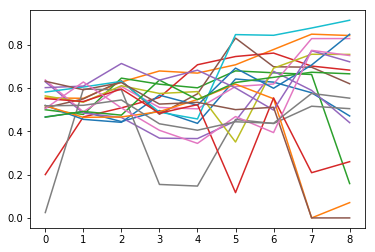

In [25]:
import operator
t=[0,0,0,0,0,0,0,0,0]
for i in range(0,len(tempacc)):
    
    t=np.add(t,tempacc[i])
    plt.plot(tempacc[i])
print(t/len(tempacc))
plt.show()

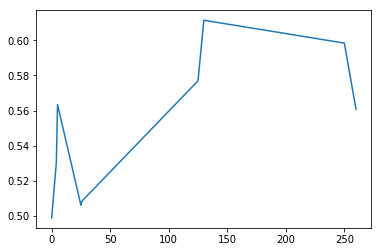

In [26]:
plt.plot(trendwindowtime,t/len(tempacc))
plt.show()